In [1]:
%run convention.ipynb

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


# Using pretrained models from keras

In [2]:
import keras

Using TensorFlow backend.


<img src = 'resnet.png'>

In [3]:
model = keras.applications.resnet50.ResNet50(weights = 'imagenet')
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
___________________________________________________________________________________________

In [4]:
from keras.layers import Dense
from keras.datasets.cifar10 import load_data
(X_train, X_test), (y_train, y_test) = load_data()
X_train, X_valid = X_train[10000:], X_train[:10000]
y_train, y_valid = y_train[10000:], y_train[:10000]

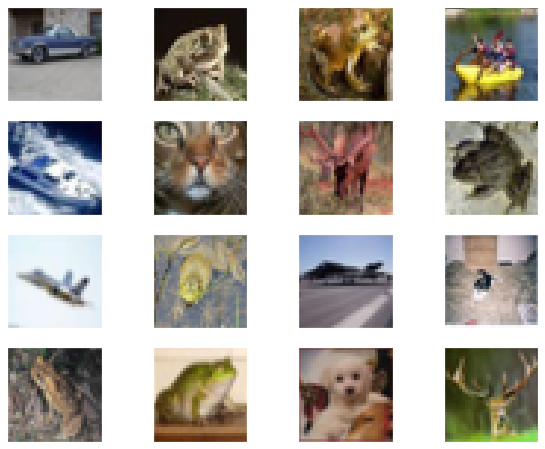

In [5]:
fig, axes = plt.subplots(4, 4, subplot_kw = {'xticks':[], 'yticks':[]}, figsize = (10, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i])

In [6]:
model.layers[-1] = Dense(10, activation = 'softmax')
for layer in model.layers[:-1]:
    layer.trainable = False
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

<code>
import tensorflow as tf
def preprocess(images):
    return [keras.applications.resnet50.preprocess_input(resize(img, [224,224])) for img in images]
resize = tf.image.resize
crop_and_resize = tf.image.crop_and_resize
X_train = preprocess(X_train)
X_valid = preprocess(X_valid)
X_test = preprocess(X_test)
</code>

# Transfer Learning

In [2]:
!pip install tensorflow_datasets

  Stored in directory: C:\Users\dell\AppData\Local\pip\Cache\wheels\92\84\9f\75e2235effae0e1c5a5c0626a503e532bbffcb7e79e672b606
  Stored in directory: C:\Users\dell\AppData\Local\pip\Cache\wheels\59\b1\91\f02e76c732915c4015ab4010f3015469866c1eb9b14058d8e7
  Stored in directory: C:\Users\dell\AppData\Local\pip\Cache\wheels\9e\3d\a2\1bec8bb7db80ab3216dbc33092bb7ccd0debfb8ba42b5668d5
Successfully built promise dill googleapis-common-protos


In [7]:
import tensorflow_datasets as tfds
import tensorflow as tf
import keras
test_split, valid_split, train_split = tfds.Split.TRAIN.subsplit([10, 15, 75])
test_set = tfds.load("tf_flowers", split=test_split, as_supervised=True)
valid_set = tfds.load("tf_flowers", split=valid_split, as_supervised=True)
train_set = tfds.load("tf_flowers", split=train_split, as_supervised=True)
def preprocess(image, label):
    resized_image = tf.image.resize(image, [224, 224])
    final_image = keras.applications.xception.preprocess_input(resized_image)
    return final_image, label
batch_size = 32
train_set = train_set.shuffle(1000).repeat()
train_set = train_set.map(preprocess).batch(batch_size).prefetch(1)
valid_set = valid_set.map(preprocess).batch(batch_size).prefetch(1)
test_set = test_set.map(preprocess).batch(batch_size).prefetch(1)
